## Attribute Information
   * Attribute 1:  (qualitative) __Status of existing checking account__                           
      A11 :      ... <    0 DM                           
      A12 : 0 <= ... <  200 DM                                   
      A13 :      ... >= 200 DM / salary assignments for at least 1 year                           
      A14 : no checking account    
      
   * Attribute 2:  (numerical) __Duration in month__

   * Attribute 3:  (qualitative) __Credit history__               
      A30 : no credits taken/all credits paid back duly                   
      A31 : all credits at this bank paid back duly                       
      A32 : existing credits paid back duly till now                       
      A33 : delay in paying off in the past                           
      A34 : critical account/other credits existing (not at this bank)          
      
   * Attribute 4:  (qualitative)    __Purpose__              
      A40 : car (new)                         
      A41 : car (used)                              
      A42 : furniture/equipment                              
      A43 : radio/television                 
      A44 : domestic appliances                     
      A45 : repairs                        
      A46 : education                      
      A47 : vacation                    
      A48 : retraining                     
      A49 : business                         
      A410 : others
   * Attribute 5:  (numerical) __Credit amount__   
   * Attibute 6:  (qualitative) __Savings account/bonds__           
      A61 :          ... <  100 DM            
      A62 :   100 <= ... <  500 DM           
      A63 :   500 <= ... < 1000 DM            
      A64 :          .. >= 1000 DM                   
      A65 :   unknown/ no savings account         
      
   * Attribute 7:  (qualitative) __Present employment since__      
        A71 : unemployed                       
        A72 :       ... < 1 year           
        A73 : 1  <= ... < 4 years         
        A74 : 4  <= ... < 7 years            
        A75 :       .. >= 7 years         
   * Attribute 8:  (numerical) __Installment rate in percentage of disposable income__ 
   * Attribute 9:  (qualitative) __Personal status and sex__                      
        A91 : male   : divorced/separated               
        A92 : female : divorced/separated/married              
        A93 : male   : single               
        A94 : male   : married/widowed              
        A95 : female : single      
   * Attribute 10: (qualitative) __Other debtors / guarantors__                   
        A101 : none                  
        A102 : co-applicant                   
        A103 : guarantor             
        
   * Attribute 11: (numerical) __Present residence since__   

   * Attribute 12: (qualitative) __Property__
        A121 : real estate                        
        A122 : if not A121 : building society savings agreement/life insurance                           
        A123 : if not A121/A122 : car or other, not in attribute 6           
        A124 : unknown / no property    
     
   * Attribute 13: (numerical) __Age in years__
   * Attribute 14: (qualitative) __Other installment plans__    
        A141 : bank   
        A142 : stores    
        A143 : none  
   * Attribute 15: (qualitative) __Housing__           
        A151 : rent       
        A152 : own          
        A153 : for free      
   * Attribute 16: (numerical) __Number of existing credits at this bank__
   * Attribute 17: (qualitative) __Job__         
        A171 : unemployed/ unskilled  - non-resident           
        A172 : unskilled - resident                  
        A173 : skilled employee / official                                
        A174 : management/ self-employed/highly qualified employee/ officer 
        
       
   
  * Attribute 18: (numerical) __Number of people being liable to provide maintenance for__ 
  * Attribute 19: (qualitative) __Telephone__             
    A191 : none              
    A192 : yes, registered under the customers name                     
  * Attribute 20: (qualitative) __foreign worker__              
    A201 : yes         
    A202 : no   


### Target Variable                                        
* __Cost Matrix__  
    * 1 = __Good Risk__
    * 2 = __Bad Risk__


## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import scikitplot as skplt
from math import floor,ceil
#import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pd.set_option('display.max_columns', None)
from sklearn.model_selection import train_test_split


import tenseal as ts
import tensorflow as tf
import pandas as pd
import torch
from torch import nn, optim
from torch.autograd.variable import Variable
from torch.utils.data import DataLoader, TensorDataset

from keras.models import Sequential
from keras.layers import Dense, LeakyReLU, Dropout
#from keras.optimizers. import Adam
from keras.optimizers.legacy import Adam
from keras.layers import Input
from keras.models import Model
#from opacus import PrivacyEngine

from sklearn import preprocessing
import warnings
warnings.simplefilter('ignore', DeprecationWarning)

## Read Data

In [2]:
df=pd.read_csv("german.data",sep=" ",header=None)
headers=["Status of existing checking account","Duration in month","Credit history",\
         "Purpose","Credit amount","Savings account/bonds","Present employment since",\
         "Installment rate in percentage of disposable income","Personal status and sex",\
         "Other debtors / guarantors","Present residence since","Property","Age in years",\
        "Other installment plans","Housing","Number of existing credits at this bank",\
        "Job","Number of people being liable to provide maintenance for","Telephone","foreign worker","Cost Matrix(Risk)"]

numerical_attributes = ["Duration in month", "Credit amount", "Installment rate in percentage of disposable income", "Present residence since", "Age in years",\
                        "Number of existing credits at this bank", "Number of people being liable to provide maintenance for"]

df.columns=headers
original_data = df.copy()


Status_of_existing_checking_account={'A14':"no checking account",'A11':"<0 DM", 'A12': "0 <= <200 DM",'A13':">= 200 DM "}
df["Status of existing checking account"]=df["Status of existing checking account"].map(Status_of_existing_checking_account)

Credit_history={"A34":"critical account","A33":"delay in paying off","A32":"existing credits paid back duly till now","A31":"all credits at this bank paid back duly","A30":"no credits taken"}
df["Credit history"]=df["Credit history"].map(Credit_history)

Purpose={"A40" : "car (new)", "A41" : "car (used)", "A42" : "furniture/equipment", "A43" :"radio/television" , "A44" : "domestic appliances", "A45" : "repairs", "A46" : "education", 'A47' : 'vacation','A48' : 'retraining','A49' : 'business','A410' : 'others'}
df["Purpose"]=df["Purpose"].map(Purpose)

Saving_account={"A65" : "no savings account","A61" :"<100 DM","A62" : "100 <= <500 DM","A63" :"500 <= < 1000 DM", "A64" :">= 1000 DM"}
df["Savings account/bonds"]=df["Savings account/bonds"].map(Saving_account)

Present_employment={'A75':">=7 years", 'A74':"4<= <7 years",  'A73':"1<= < 4 years", 'A72':"<1 years",'A71':"unemployed"}
df["Present employment since"]=df["Present employment since"].map(Present_employment)



Personal_status_and_sex={ 'A95':"female:single",'A94':"male:married/widowed",'A93':"male:single", 'A92':"female:divorced/separated/married", 'A91':"male:divorced/separated"}
df["Personal status and sex"]=df["Personal status and sex"].map(Personal_status_and_sex)


Other_debtors_guarantors={'A101':"none", 'A102':"co-applicant", 'A103':"guarantor"}
df["Other debtors / guarantors"]=df["Other debtors / guarantors"].map(Other_debtors_guarantors)


Property={'A121':"real estate", 'A122':"savings agreement/life insurance", 'A123':"car or other", 'A124':"unknown / no property"}
df["Property"]=df["Property"].map(Property)




Other_installment_plans={'A143':"none", 'A142':"store", 'A141':"bank"}
df["Other installment plans"]=df["Other installment plans"].map(Other_installment_plans)

Housing={'A153':"for free", 'A152':"own", 'A151':"rent"}
df["Housing"]=df["Housing"].map(Housing)




Job={'A174':"management/ highly qualified employee", 'A173':"skilled employee / official", 'A172':"unskilled - resident", 'A171':"unemployed/ unskilled  - non-resident"}
df["Job"]=df["Job"].map(Job)

Telephone={'A192':"yes", 'A191':"none"}
df["Telephone"]=df["Telephone"].map(Telephone)



foreign_worker={'A201':"yes", 'A202':"no"}
df["foreign worker"]=df["foreign worker"].map(foreign_worker)



#risk={1:"Good Risk", 2:"Bad Risk"}
#df["Cost Matrix(Risk)"]=df["Cost Matrix(Risk)"].map(risk)



## <a name="data_overview">Data Overview</a>

In [3]:
df.head() #top 5 rows of the dataset

Status of existing checking account  Duration in month  \
0                               <0 DM                  6   
1                        0 <= <200 DM                 48   
2                 no checking account                 12   
3                               <0 DM                 42   
4                               <0 DM                 24   

                             Credit history              Purpose  \
0                          critical account     radio/television   
1  existing credits paid back duly till now     radio/television   
2                          critical account            education   
3  existing credits paid back duly till now  furniture/equipment   
4                       delay in paying off            car (new)   

   Credit amount Savings account/bonds Present employment since  \
0           1169    no savings account                >=7 years   
1           5951               <100 DM            1<= < 4 years   
2           2096               <100 DM             4<= <7 years   
3           7882               <100 DM             4<= <7 years   
4           4870               <100 DM            1<= < 4 years   

   Installment rate in percentage of disposable income  \
0                                                  4     
1                                                  2     
2                                                  2     
3                                                  2     
4                                                  3     

             Personal status and sex Other debtors / guarantors  \
0                        male:single                       none   
1  female:divorced/separated/married                       none   
2                        male:single                       none   
3                        male:single                  guarantor   
4                        male:single                       none   

   Present residence since                          Property  Age in years  \
0                        4                       real estate            67   
1                        2                       real estate            22   
2                        3                       real estate            49   
3                        4  savings agreement/life insurance            45   
4                        4             unknown / no property            53   

  Other installment plans   Housing  Number of existing credits at this bank  \
0                    none       own                                        2   
1                    none       own                                        1   
2                    none       own                                        1   
3                    none  for free                                        1   
4                    none  for free                                        2   

                           Job  \
0  skilled employee / official   
1  skilled employee / official   
2         unskilled - resident   
3  skilled employee / official   
4  skilled employee / official   

   Number of people being liable to provide maintenance for Telephone  \
0                                                  1              yes   
1                                                  1             none   
2                                                  2             none   
3                                                  2             none   
4                                                  2             none   

  foreign worker  Cost Matrix(Risk)  
0            yes                  1  
1            yes                  2  
2            yes                  1  
3            yes                  1  
4            yes                  2

### <a name="data-types">Data Info</a>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Status of existing checking account                       1000 non-null   object
 1   Duration in month                                         1000 non-null   int64 
 2   Credit history                                            1000 non-null   object
 3   Purpose                                                   1000 non-null   object
 4   Credit amount                                             1000 non-null   int64 
 5   Savings account/bonds                                     1000 non-null   object
 6   Present employment since                                  1000 non-null   object
 7   Installment rate in percentage of disposable income       1000 non-null   int64 
 8   Personal status and sex      

In [5]:
df.describe()

Duration in month  Credit amount  \
count        1000.000000    1000.000000   
mean           20.903000    3271.258000   
std            12.058814    2822.736876   
min             4.000000     250.000000   
25%            12.000000    1365.500000   
50%            18.000000    2319.500000   
75%            24.000000    3972.250000   
max            72.000000   18424.000000   

       Installment rate in percentage of disposable income  \
count                                        1000.000000     
mean                                            2.973000     
std                                             1.118715     
min                                             1.000000     
25%                                             2.000000     
50%                                             3.000000     
75%                                             4.000000     
max                                             4.000000     

       Present residence since  Age in years  \
count              1000.000000   1000.000000   
mean                  2.845000     35.546000   
std                   1.103718     11.375469   
min                   1.000000     19.000000   
25%                   2.000000     27.000000   
50%                   3.000000     33.000000   
75%                   4.000000     42.000000   
max                   4.000000     75.000000   

       Number of existing credits at this bank  \
count                              1000.000000   
mean                                  1.407000   
std                                   0.577654   
min                                   1.000000   
25%                                   1.000000   
50%                                   1.000000   
75%                                   2.000000   
max                                   4.000000   

       Number of people being liable to provide maintenance for  \
count                                        1000.000000          
mean                                            1.155000          
std                                             0.362086          
min                                             1.000000          
25%                                             1.000000          
50%                                             1.000000          
75%                                             1.000000          
max                                             2.000000          

       Cost Matrix(Risk)  
count        1000.000000  
mean            1.300000  
std             0.458487  
min             1.000000  
25%             1.000000  
50%             1.000000  
75%             2.000000  
max             2.000000

## Exploratory Data Analysis (EDA)



## Correlation Matrix

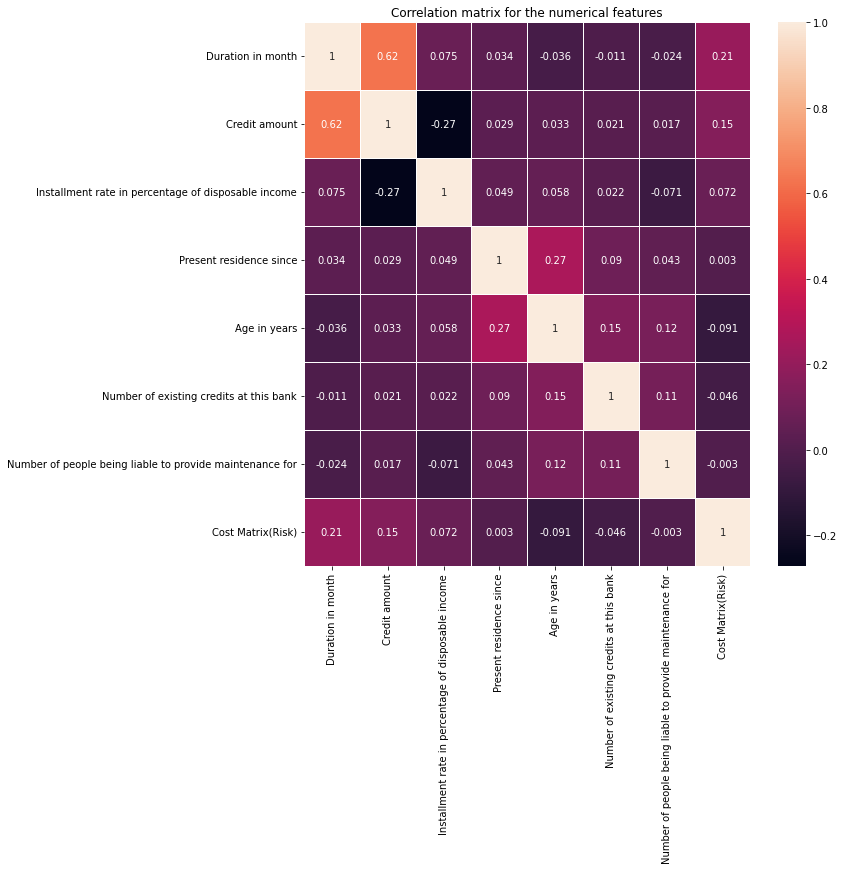

In [6]:
corr = df.corr()

fig, ax = plt.subplots(figsize=(10,10)) 
ax = sns.heatmap(corr, annot=True, linewidth=0.5, xticklabels=numerical_attributes + ["Cost Matrix(Risk)"])
ax.set_yticklabels(labels=numerical_attributes + ["Cost Matrix(Risk)"], rotation=0)
ax.set_title("Correlation matrix for the numerical features")
plt.show()

In [7]:
df_numerical = df.copy()

dummy_columns = ["Credit history", "Purpose", "Personal status and sex", "Other debtors / guarantors", "Property", "Other installment plans", "Housing", \
            "foreign worker", "Status of existing checking account", "Savings account/bonds", "Telephone", "Job", "Present employment since"]

df_numerical = pd.get_dummies(df_numerical, columns=dummy_columns, drop_first=True)

In [8]:
 df_numerical.head()

Duration in month  Credit amount  \
0                  6           1169   
1                 48           5951   
2                 12           2096   
3                 42           7882   
4                 24           4870   

   Installment rate in percentage of disposable income  \
0                                                  4     
1                                                  2     
2                                                  2     
3                                                  2     
4                                                  3     

   Present residence since  Age in years  \
0                        4            67   
1                        2            22   
2                        3            49   
3                        4            45   
4                        4            53   

   Number of existing credits at this bank  \
0                                        2   
1                                        1   
2                                        1   
3                                        1   
4                                        2   

   Number of people being liable to provide maintenance for  \
0                                                  1          
1                                                  1          
2                                                  2          
3                                                  2          
4                                                  2          

   Cost Matrix(Risk)  Credit history_critical account  \
0                  1                                1   
1                  2                                0   
2                  1                                1   
3                  1                                0   
4                  2                                0   

   Credit history_delay in paying off  \
0                                   0   
1                                   0   
2                                   0   
3                                   0   
4                                   1   

   Credit history_existing credits paid back duly till now  \
0                                                  0         
1                                                  1         
2                                                  0         
3                                                  1         
4                                                  0         

   Credit history_no credits taken  Purpose_car (new)  Purpose_car (used)  \
0                                0                  0                   0   
1                                0                  0                   0   
2                                0                  0                   0   
3                                0                  0                   0   
4                                0                  1                   0   

   Purpose_domestic appliances  Purpose_education  \
0                            0                  0   
1                            0                  0   
2                            0                  1   
3                            0                  0   
4                            0                  0   

   Purpose_furniture/equipment  Purpose_others  Purpose_radio/television  \
0                            0               0                         1   
1                            0               0                         1   
2                            0               0                         0   
3                            1               0                         0   
4                            0               0                         0   

   Purpose_repairs  Purpose_retraining  \
0                0                   0   
1                0                   0   
2                0                   0   
3                0                   0   
4                0                   0   

   Personal status and sex_male:divorced/se

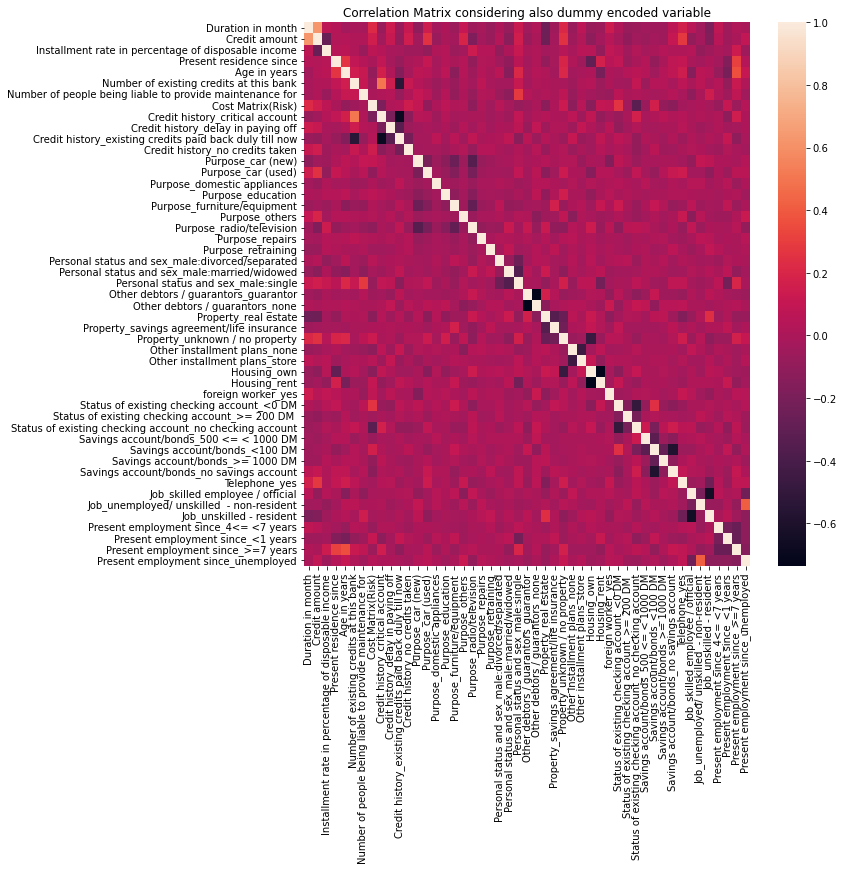

In [9]:
corr = df_numerical.corr()

fig, ax = plt.subplots(figsize=(10,10)) 
ax = sns.heatmap(corr, xticklabels=corr.columns)
ax.set_yticklabels(labels=corr.columns, rotation=0) 
ax.set_title("Correlation Matrix considering also dummy encoded variable")
plt.show()

In [10]:
corr_unstacked = corr.unstack().abs()
ranked_corr = corr_unstacked.sort_values(kind="quicksort", ascending=False)
ranked_corr = ranked_corr[ranked_corr != 1]

ranked_corr.head(20)

Housing_rent                                             Housing_own                                                0.735968
Housing_own                                              Housing_rent                                               0.735968
Other debtors / guarantors_none                          Other debtors / guarantors_guarantor                       0.731408
Other debtors / guarantors_guarantor                     Other debtors / guarantors_none                            0.731408
Credit history_critical account                          Credit history_existing credits paid back duly till now    0.683617
Credit history_existing credits paid back duly till now  Credit history_critical account                            0.683617
Job_skilled employee / official                          Job_unskilled - resident                                   0.652438
Job_unskilled - resident                                 Job_skilled employee / official                            0.652438


In [11]:
## Class proposition to see Good and Bad

column_names=df.columns.tolist()
column_names.remove("Credit amount") #numerical variable
column_names.remove("Age in years") #numerical variable
column_names.remove("Duration in month") #numerical variable
#----------------------------------------------------------------------------------------

column_names_cat={}
for name in column_names:
    column_names_cat[name]=len(df[name].unique().tolist())

    marginal_report_cluster={}
for itr in range(0,np.asarray(list(column_names_cat.values())).max()+1):
    if [k for k,v in column_names_cat.items() if v == itr]:
        marginal_report_cluster[itr]=[k for k,v in column_names_cat.items() if v == itr]

#----------------------------------------------------------------------------------------
for key in marginal_report_cluster.keys():
    marginal_percentage_report=[]
    for name in sorted(marginal_report_cluster[key]):
        data=pd.crosstab(df[name],columns=["Percentage"]).apply(lambda r: (round((r/r.sum())*100,2)), axis=0).reset_index()
        data.columns=[name,"Percentage"]
        data=data.transpose().reset_index()
        [marginal_percentage_report.append(x) for x in data.values.tolist()]
        options=[]
    marginal_percentage_report=pd.DataFrame(marginal_percentage_report)
    [options.append("Category Option "+str(itr)) for itr in range(1,len(marginal_percentage_report.columns))]
    marginal_percentage_report.columns=["Attribute"]+options
    

### Desc Numerical Variables

In [12]:
df[["Credit amount","Age in years","Duration in month"]].describe()

Credit amount  Age in years  Duration in month
count    1000.000000   1000.000000        1000.000000
mean     3271.258000     35.546000          20.903000
std      2822.736876     11.375469          12.058814
min       250.000000     19.000000           4.000000
25%      1365.500000     27.000000          12.000000
50%      2319.500000     33.000000          18.000000
75%      3972.250000     42.000000          24.000000
max     18424.000000     75.000000          72.000000

### Box plot Numerical Variables

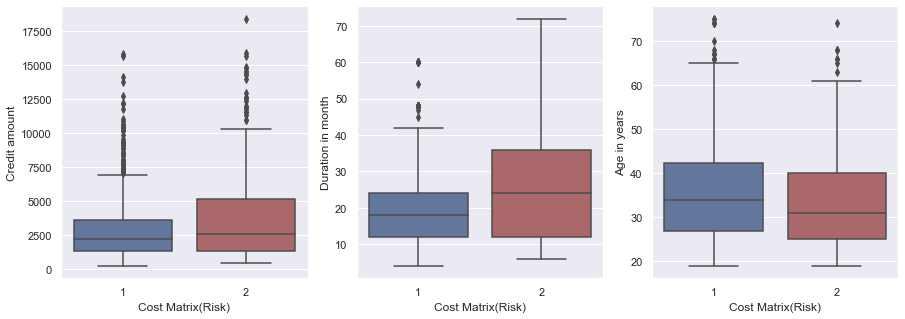

In [13]:
sns.set()
f, axes = plt.subplots(1, 3,figsize=(15,5))
sns.boxplot(y=df["Credit amount"],x=df["Cost Matrix(Risk)"],orient='v' , ax=axes[0],palette=["#5975A4","#B55D60"]) #box plot
sns.boxplot(y=df["Duration in month"],x=df["Cost Matrix(Risk)"], orient='v' , ax=axes[1],palette=["#5975A4","#B55D60"]) #box plot
sns.boxplot(y=df["Age in years"],x=df["Cost Matrix(Risk)"], orient='v' , ax=axes[2],palette=["#5975A4","#B55D60"]) #box plot
plt.show()

In [14]:
#X = df.drop('Cost Matrix(Risk)', 1).values #independent variables
#y = df["Cost Matrix(Risk)"].values #target variables

In [15]:
# Spliting dataset into train and test version
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30,random_state=42)

In [16]:
context = ts.context(ts.SCHEME_TYPE.CKKS, poly_modulus_degree=8192, coeff_mod_bit_sizes=[60,40,40,60])
context.generate_galois_keys() #Optional
context.global_scale = pow(2,10)

In [17]:
le = preprocessing.LabelEncoder()
for column in df.columns:
    if df[column].dtype == type(object):
        df[column] = le.fit_transform(df[column])

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df.iloc[:,0:-1] = scaler.fit_transform(df.iloc[:,0:-1].to_numpy())
df

Status of existing checking account  Duration in month  Credit history  \
0                              -0.464594          -1.236478       -1.146212   
1                              -1.262865           2.248194        0.734365   
2                               1.131948          -0.738668       -1.146212   
3                              -0.464594           1.750384        0.734365   
4                              -0.464594           0.256953       -0.205923   
..                                   ...                ...             ...   
995                             1.131948          -0.738668        0.734365   
996                            -0.464594           0.754763        0.734365   
997                             1.131948          -0.738668        0.734365   
998                            -0.464594           1.999289        0.734365   
999                            -1.262865           1.999289       -1.146212   

      Purpose  Credit amount  Savings account/bonds  Present employment since  \
0    1.151303      -0.745131               1.669901                  1.097762   
1    1.151303       0.949817              -0.130531                 -1.134975   
2    0.047818      -0.416562              -0.130531                 -0.390729   
3    0.415646       1.634247              -0.130531                 -0.390729   
4   -1.055668       0.566664              -0.130531                 -1.134975   
..        ...            ...                    ...                       ...   
995  0.415646      -0.544162              -0.130531                 -0.390729   
996 -0.687839       0.207612              -0.130531                 -1.134975   
997  1.151303      -0.874503              -0.130531                  1.097762   
998  1.151303      -0.505528              -0.130531                 -1.134975   
999 -0.687839       0.462457              -1.930964                  1.842008   

     Installment rate in percentage of disposable income  \
0                                             0.918477     
1                                            -0.870183     
2                                            -0.870183     
3                                            -0.870183     
4                                             0.024147     
..                                                 ...     
995                                           0.024147     
996                                           0.918477     
997                                           0.918477     
998                                           0.918477     
999                                           0.024147     

     Personal status and sex  Other debtors / guarantors  \
0                   0.830971                    0.301109   
1                  -1.390876                    0.301109   
2                   0.830971                    0.301109   
3                   0.830971                   -1.945974   
4                   0.830971                    0.301109   
..                       ...                         ...   
995                -1.390876                    0.301109   
996                -0.650260                    0.301109   
997                 0.830971                    0.301109   
998                 0.830971                    0.301109   
999                 0.830971                    0.301109   

     Present residence since  Property  Age in years  Other installment plans  \
0                   1.046987 -0.195089      2.766456                 0.218346   
1                  -0.765977 -0.195089     -1.191404                 0.218346   
2                   0.140505 -0.195089      1.183312                 0.218346   
3                   1.046987  0.742840      0.831502                 0.218346   
4                   1.046987  1.680770      1.535122                 0.218346   
..                       ...       ...           ...                      ...   
995                 1.046987 -0.195089     -0.399832                 0.218

In [19]:

data = torch.tensor(data.values).float()  
#print(data)

TypeError: can't convert np.ndarray of type numpy.object_. The only supported types are: float64, float32, float16, complex64, complex128, int64, int32, int16, int8, uint8, and bool.

In [20]:
data = df.copy()
dataset = df.values
X = dataset[:, :-1]
X = X.astype(str)
y = dataset[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (670, 20) (670,)
Test (330, 20) (330,)


In [21]:
encrypted_data = []
encrypted_data = [ts.ckks_tensor(context, x.tolist()) for x in X_train]

In [23]:
#batch the data
batch_size = 50
num_batches = len(encrypted_data) // batch_size
encrypted_batches = [encrypted_data[i:i + batch_size] for i in range(0,len(encrypted_data), batch_size)]

In [24]:
df.iloc[0][0]

-0.46459370199189765

In [25]:
#Define Generator
def create_generator():
    generator = Sequential()
    generator.add(Dense(units=256, input_dim=X_train.shape[1]))
    generator.add(LeakyReLU(0.2))
    
    generator.add(Dense(units=512))
    generator.add(LeakyReLU(0.2))
    
    generator.add(Dense(units=1024))
    generator.add(LeakyReLU(0.2))
    
    generator.add(Dense(units=X_train.shape[1], activation='sigmoid'))
    
    generator.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0002, beta_1=0.5))
    return generator

In [26]:
#Define discriminator
def create_discriminator():
    discriminator = Sequential()
    discriminator.add(Dense(units=256, input_dim=X_train.shape[1]))
    discriminator.add(LeakyReLU(0.2))
    discriminator.add(Dropout(0.3))
    
    discriminator.add(Dense(units=512))
    discriminator.add(LeakyReLU(0.2))
    discriminator.add(Dropout(0.3))
    
    discriminator.add(Dense(units=256))
    discriminator.add(Dense(units=0))
    discriminator.add(LeakyReLU(0.2))
    
    discriminator.add(Dense(units=X_train.shape[1], activation='sigmoid'))
    
    discriminator.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0002, beta_1=0.5))
    return discriminator

In [27]:
# Define GAN
def create_gan(discriminator, generator):
    discriminator.trainable = False
    gan_input = Input(shape=(X_train.shape[1],))
    #print(gan_input)
    x = generator(gan_input)
    gan_output = discriminator(x)
    gan = Model(inputs=gan_input, outputs=gan_output)
    gan.compile(loss= 'binary_crossentropy', optimizer='adam')
    gan.summary()
    return gan

In [28]:
# import tensorflow as tf

# data_list_x = tf.stack(X)
# data_list_y = tf.stack(y)

In [29]:
size = 20 #X_train.shape[1]

In [30]:
#train GAN model
def train_gan(gan, generator, discriminator, epochs=1, batch_size=20):
    for e in range(epochs):
        for batch in encrypted_batches:
            
            noise = np.random.normal(0,1,[batch_size,size])
            generated_data = generator.predict(noise)
            
            #Decrypted Data
            #decrypted_batch = [enc_val.decrypt() for enc_val in batch]
            #real_data = torch.Tensor(decrypted_batch)
            
            #Encrypted Data
            real_data = batch
            #print((real_data))
            #real_data = np.stack(real_data, axis=0)
            discriminator.trainable = True
            discriminator.train_on_batch(real_data, np.ones((batch_size,size)))
            discriminator.train_on_batch(generated_data, np.zeros((batch_size,size)))
            discriminator.trainable = False
            accuracy = gan.train_on_batch(noise, np.ones((batch_size,size)))

In [31]:
np.ones((batch_size, size)).shape

(50, 20)

In [ ]:
#train the models
generator = create_generator()
discriminator = create_discriminator()

In [ ]:
gan = create_gan(discriminator, generator)
train_gan(gan,generator, discriminator)

In [ ]:
#x_train = tf.cast(X , dtype=tf.float32)
#y_train = tf.cast(Y , dtype=tf.float32)
gan.fit(X_train, Y_train)
test_loss,test_acc = gan.evaluate(X,Y)

In [73]:
X_train.shape[1]

torch.Size([800, 20])

In [36]:
from tensorflow import keras

In [ ]:

# Define the training loop
batch_size = 50
epochs = 2  # Adjust as needed
latent_dim = X_train.shape[1]  # Dimension of the generator's input (random noise)
num_features = X_train.shape[1]  # Number of features in your dataset
# Define the Generator
generator = keras.Sequential([
    keras.layers.Dense(128, input_dim=latent_dim, activation='relu'),
    keras.layers.Dense(num_features, activation='sigmoid')  # Output layer, 'linear' activation for regression
])

# Define the Discriminator
discriminator = keras.Sequential([
    keras.layers.Input(shape=(num_features,), ),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # Output layer with binary classification
])

# Define the GAN model (combining generator and discriminator)
discriminator.trainable = False  # Freeze discriminator during GAN training
gan_input = keras.Input(shape=(latent_dim,))
gan_output = discriminator(generator(gan_input))
gan = keras.models.Model(gan_input, gan_output)

# Compile the models
generator.compile(optimizer='adam', loss='mean_squared_error')
discriminator.compile(optimizer='adam', loss='binary_crossentropy')
gan.compile(optimizer='adam', loss='binary_crossentropy')

# Load your dataset into a DataFrame
# data = pd.read_csv('your_dataset.csv')



for epoch in range(epochs):
    for batch in encrypted_batches:
        
        
        # Train the discriminator on real data
        idx = np.random.randint(0, len(encrypted_data), batch_size)
        real_data_batch =  [encrypted_data[i].serialize() for i in idx  ]
        real_labels = np.ones((batch_size, 1))        
        #real_labelsencrypted_data = [ts.ckks_vector(context, x.tolist()) for x in X_train]
  
        d_loss_real = discriminator.train_on_batch(real_data_batch, real_labels)

        # Train the discriminator on fake data generated by the generator
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        generated_data = generator.predict(noise)
        fake_labels = np.zeros((batch_size, 1))
        d_loss_fake = discriminator.train_on_batch(generated_data, fake_labels)

        # Train the generator (via the GAN model)
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        valid_labels = np.ones((batch_size, 1))
        g_loss = gan.train_on_batch(noise, valid_labels)

        # Print progress
        print(f"Epoch {epoch}/{epochs}, D Loss Real: {d_loss_real}, D Loss Fake: {d_loss_fake}, G Loss: {g_loss}")

    # Optionally, you can save generated samples or models at certain intervals

# After training, you can use the generator to generate synthetic data
synthetic_data = generator.predict(noise)

In [99]:
idx = np.random.randint(0, len(encrypted_data), batch_size)
real_data_batch =  [encrypted_data[i].serialize() for i in idx  ]

In [90]:
import torch
import torch.nn as nn
import torch.optim as optim

In [91]:
class Generator(nn.Module):
    def __init__(self, input_size, output_size):
        super(Generator, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Linear(128, output_size),
            nn.Tanh()  # Tanh activation for generating values between -1 and 1
        )

    def forward(self, x):
        return self.fc(x)

class Discriminator(nn.Module):
    def __init__(self, input_size):
        super(Discriminator, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Linear(128, 1),
            nn.Sigmoid()  # Sigmoid activation for binary classification
        )

    def forward(self, x):
        return self.fc(x)

In [92]:
generator = Generator(input_size=100, output_size=784)  # Example input and output sizes
discriminator = Discriminator(input_size=784)  # Input size matches generator's output size

In [9]:
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss

optimizer_g = optim.Adam(generator.parameters(), lr=0.0002)
optimizer_d = optim.Adam(discriminator.parameters(), lr=0.0002)


In [ ]:
num_epochs = 2
batch_size = 50

for epoch in range(num_epochs):
    for batch in range(0, len(data), batch_size):
        real_data = get_real_data(batch_size)  # Replace with your data loading logic
        fake_data = generator(torch.randn(batch_size, 100))

        # Train discriminator
        optimizer_d.zero_grad()
        d_real = discriminator(real_data)
        d_fake = discriminator(fake_data.detach())
        loss_d = -torch.mean(torch.log(d_real) + torch.log(1 - d_fake))
        loss_d.backward()
        optimizer_d.step()

        # Train generator
        optimizer_g.zero_grad()
        d_fake = discriminator(fake_data)
        loss_g = -torch.mean(torch.log(d_fake))
        loss_g.backward()
        optimizer_g.step()


In [ ]:
with torch.no_grad():
    noise = torch.randn(1, 100)
    generated_sample = generator(noise)
